In [1]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import os
import numpy as np
from IPython.display import Audio
import wave
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import wavfile
from scipy.signal import spectrogram
import tensorflow as tf
import tensorflow_io as tfio
from IPython.display import Audio

/tmp/ipykernel_110432/3121891711.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-03-10 17:50:55.012869: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 17:50:55.012908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 17:50:55.014442: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable

In [2]:
root_fp = "../../DATA/ml-stuttering-events-dataset/"
CLIPS_DIR = "/home/alien/Git/DATA/ml-stuttering-events-dataset/CLIP_DIR/"
df = pd.read_csv("/home/alien/Git/DATA/ml-stuttering-events-dataset/SEP-28k_labels.csv")
df.head()
df.shape

(28177, 17)

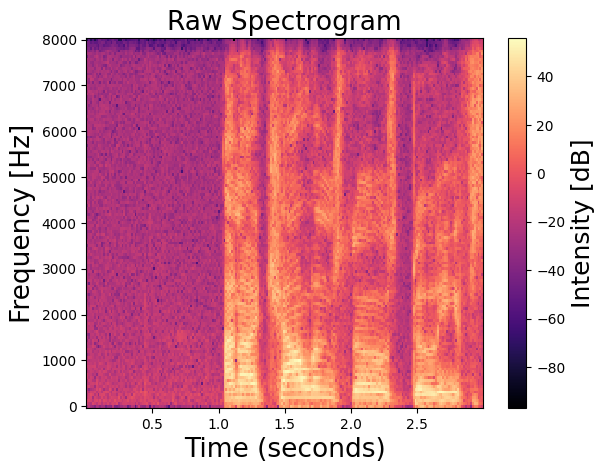

In [3]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
import numpy as np

# Load the WAV file
sample_rate, samples = wavfile.read('/home/alien/Git/DATA/ml-stuttering-events-dataset/CLIP_DIR/HeStutters/0/HeStutters_0_1.wav')

# Create the spectrogram
frequencies, times, spectrogram_data = spectrogram(samples, sample_rate)

# Plot the spectrogram
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), cmap='magma')
plt.title('Raw Spectrogram', fontsize=19)  # Set title font size to 16
plt.ylabel('Frequency [Hz]', fontsize=19)   # Set ylabel font size to 14
plt.xlabel('Time (seconds)', fontsize=19)       # Set xlabel font size to 14
colorbar = plt.colorbar(label='Intensity [dB]')
colorbar.ax.yaxis.label.set_fontsize(18)   # Set colorbar label font size to 14
plt.show()


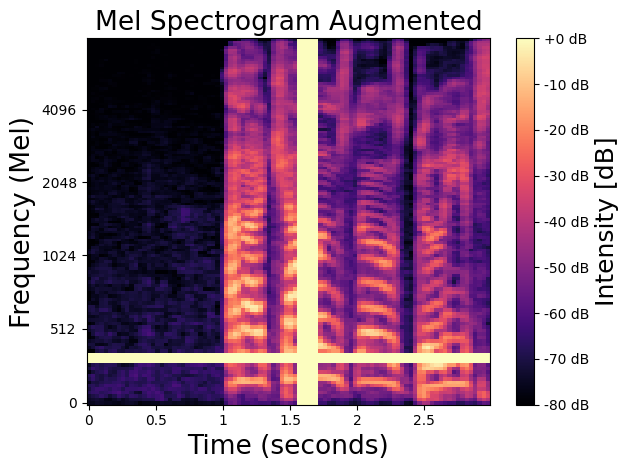

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
import librosa.display

# Load the audio file
sample_rate, samples = wavfile.read('/home/alien/Git/DATA/ml-stuttering-events-dataset/CLIP_DIR/HeStutters/0/HeStutters_0_1.wav')

# Compute the Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=samples.astype(float), sr=sample_rate, n_fft=2048, hop_length=512, n_mels=128)

# Convert power to dB scale (log scale)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

freq_mask = tfio.audio.freq_mask(mel_spectrogram_db, param=8)
time_mask = tfio.audio.time_mask(freq_mask, param=8) # FINAL

rotated_spectrogram = np.rot90(time_mask.numpy(), k=1)

# Plot the Mel spectrogram
librosa.display.specshow(time_mask.numpy(), x_axis='time', y_axis='mel', sr=sample_rate, hop_length=512, cmap='magma')
colorbar = plt.colorbar(label='Intensity [dB]',format='%+2.0f dB')
colorbar.ax.yaxis.label.set_fontsize(18)   # Set colorbar label font size to 14
plt.title('Mel Spectrogram Augmented', fontsize=19)
plt.xlabel('Time (seconds)', fontsize=19)
plt.ylabel('Frequency (Mel)', fontsize=19)
plt.tight_layout()
plt.show()


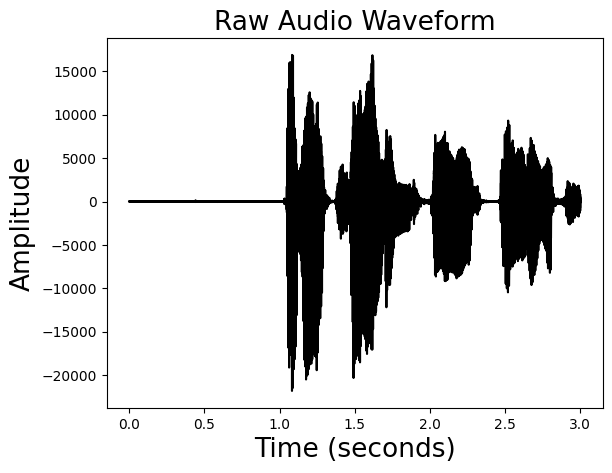

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the audio file
sample_rate, samples = wavfile.read('/home/alien/Git/DATA/ml-stuttering-events-dataset/CLIP_DIR/HeStutters/0/HeStutters_0_1.wav')

# Calculate time array
duration = len(samples) / sample_rate
time = np.linspace(0., duration, len(samples))

# Plot the soundwave
plt.plot(time, samples, color='black')
plt.title('Raw Audio Waveform', fontsize=19)
plt.xlabel('Time (seconds)', fontsize=19)
plt.ylabel('Amplitude', fontsize=19)
plt.show()
